# Lab 3 — Affine Transformations (OpenCV)

This notebook consolidates **Tasks 1–4** (translation, rotation, scaling, shearing) into a single file you can work with and submit.

**How to use**
1. Put your image (e.g., `lena.png`) in the same folder as this notebook **or** update `IMAGE_PATH` below.
2. Run cells top-to-bottom.
3. The notebook will **display** each result and also **save** outputs into `outputs/` for submission screenshots.


Loaded image shape: (900, 1600, 3)


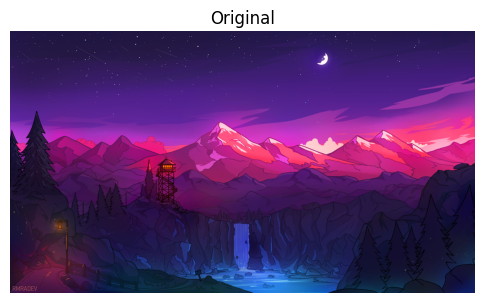

In [6]:
# If needed, install dependencies (uncomment and run)
# !pip install opencv-python matplotlib numpy

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (6, 6)

# --- Config ---
IMAGE_PATH = '/content/mount2.png'   # change if your image is elsewhere
OUT_DIR = 'outputs'
os.makedirs(OUT_DIR, exist_ok=True)

def read_image(path: str):
    img = cv2.imread(path)
    if img is None:
        # Fallback: create a simple synthetic image so the notebook still runs.
        img = np.zeros((512, 512, 3), dtype=np.uint8)
        cv2.rectangle(img, (60, 60), (452, 452), (255, 255, 255), 6)
        cv2.circle(img, (256, 256), 120, (0, 255, 255), 6)
        cv2.putText(img, 'NO IMAGE FILE', (80, 260), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 200, 0), 2)
        print(f"⚠️ Could not find '{path}'. Using a synthetic placeholder image.")
    return img

image = read_image(IMAGE_PATH)
h, w = image.shape[:2]
print('Loaded image shape:', image.shape)

def show_bgr(img, title=''):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

show_bgr(image, 'Original')


## Part 1 — Translation (Task 1)

Experiment with different translation values `(tx, ty)`, including **negative** shifts.


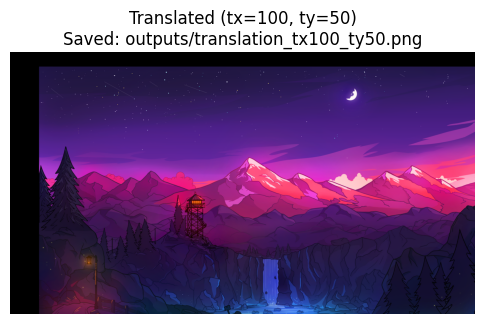

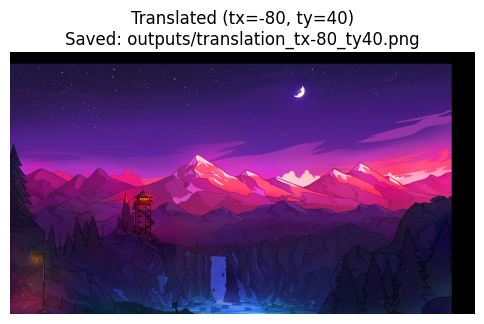

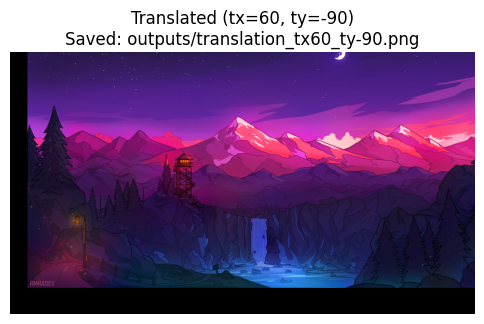

In [7]:
def translate(img, tx: int, ty: int):
    M = np.float32([[1, 0, tx],
                    [0, 1, ty]])
    return cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

# Try a few translations (edit these)
translations = [(100, 50), (-80, 40), (60, -90)]

for tx, ty in translations:
    out = translate(image, tx, ty)
    fname = os.path.join(OUT_DIR, f"translation_tx{tx}_ty{ty}.png")
    cv2.imwrite(fname, out)
    show_bgr(out, f"Translated (tx={tx}, ty={ty})\nSaved: {fname}")


## Part 2 — Rotation (Task 2)

Rotate by multiple angles and try rotation with **scaling** (scale factor ≠ 1.0).


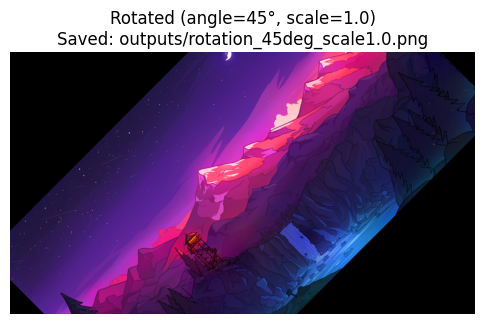

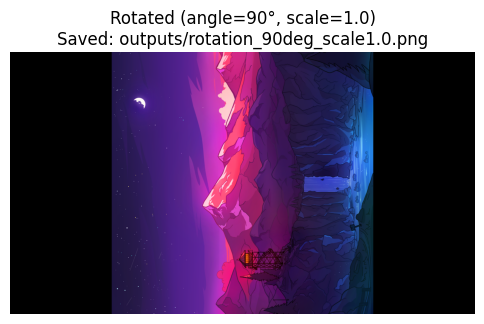

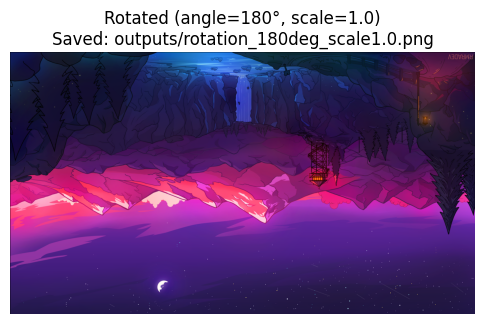

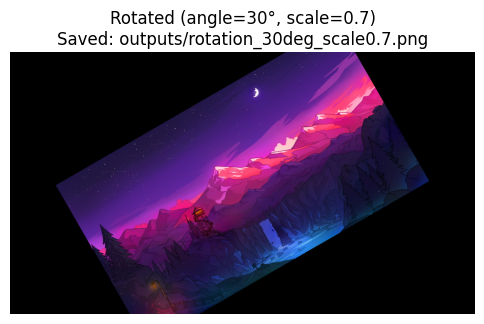

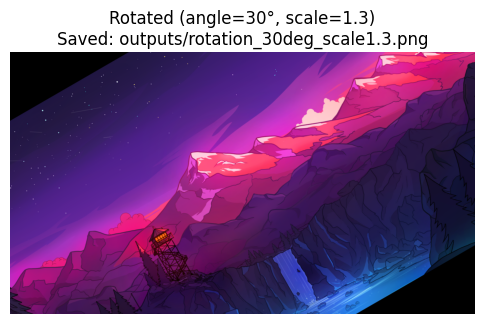

In [8]:
def rotate(img, angle_deg: float, scale: float = 1.0):
    h, w = img.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle_deg, scale)
    return cv2.warpAffine(img, M, (w, h))

# Try angles + scaling (edit these)
rotations = [
    (45, 1.0),
    (90, 1.0),
    (180, 1.0),
    (30, 0.7),
    (30, 1.3),
]

for angle, sc in rotations:
    out = rotate(image, angle, sc)
    fname = os.path.join(OUT_DIR, f"rotation_{angle}deg_scale{sc}.png")
    cv2.imwrite(fname, out)
    show_bgr(out, f"Rotated (angle={angle}°, scale={sc})\nSaved: {fname}")


## Part 3 — Scaling (Task 3)

Scale by factors like **0.5, 1.5**, and then try **extreme scaling** (e.g., 5, 8, 10, 20) and observe quality changes.


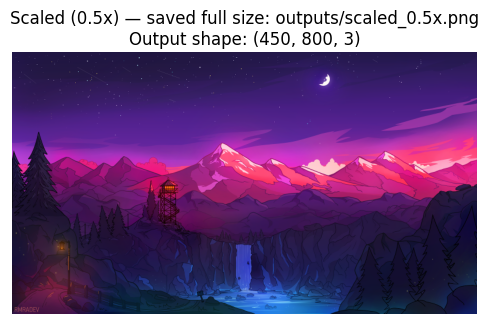

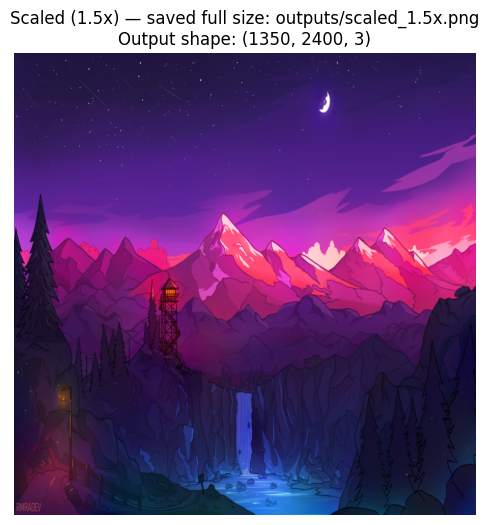

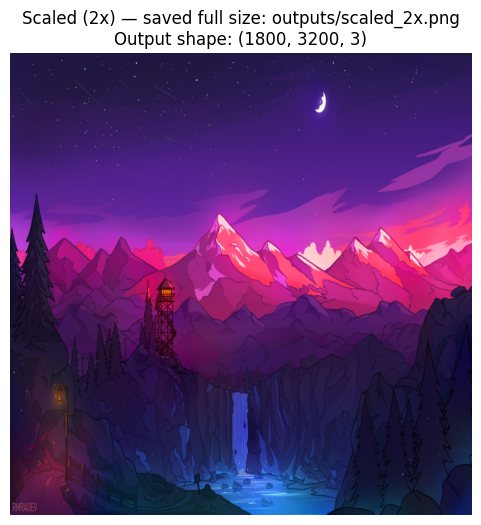

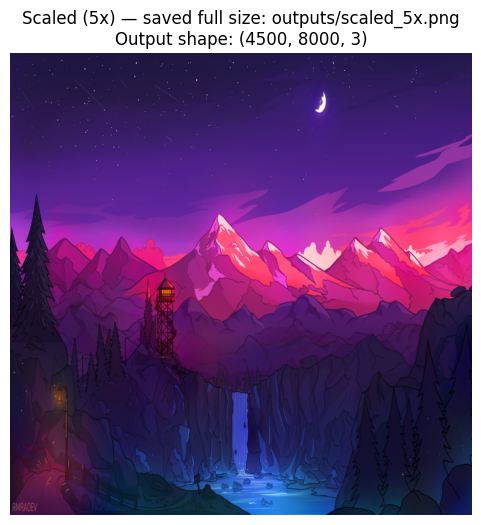

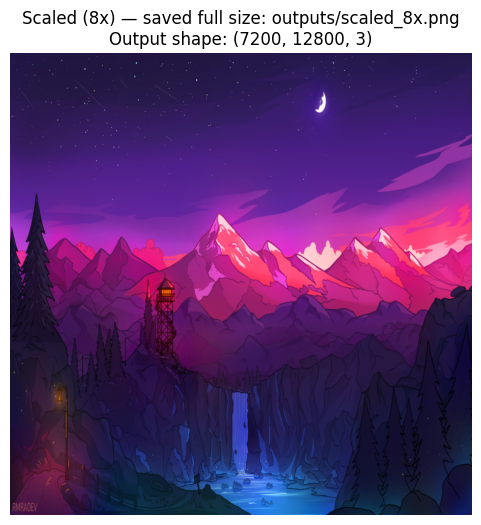

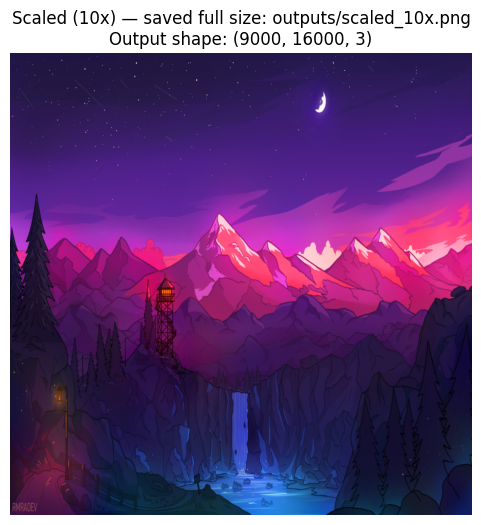

In [9]:
def scale(img, factor: float):
    h, w = img.shape[:2]
    new_w = max(1, int(round(w * factor)))
    new_h = max(1, int(round(h * factor)))
    # Using linear interpolation (default is fine); you can try INTER_NEAREST / INTER_CUBIC as an experiment.
    return cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_LINEAR)

factors = [0.5, 1.5, 2, 5, 8, 10]  # add 20 if you want (might be large)

for f in factors:
    out = scale(image, f)
    fname = os.path.join(OUT_DIR, f"scaled_{f}x.png")
    cv2.imwrite(fname, out)
    # For big images, show a resized preview but keep the saved file full size
    preview = out
    if out.shape[0] > 900 or out.shape[1] > 900:
        preview = cv2.resize(out, (min(900, out.shape[1]), min(900, out.shape[0])), interpolation=cv2.INTER_AREA)
    show_bgr(preview, f"Scaled ({f}x) — saved full size: {fname}\nOutput shape: {out.shape}")


### Notes for Task 3 (quality discussion)

Write your observations here after checking the saved images (especially large factors):

- **Downscaling (e.g., 0.5x):** …
- **Moderate upscaling (e.g., 1.5x–2x):** …
- **Extreme upscaling (e.g., 5x–10x–20x):** …

Tip: you can try different interpolation methods in `cv2.resize`:
- `INTER_NEAREST` (blocky)
- `INTER_LINEAR` (default)
- `INTER_CUBIC` (smoother but slower)
- `INTER_LANCZOS4` (high quality but slower)


## Part 4 — Shearing (Task 4)

Shear along **x** and **y** axes with different factors and discuss distortion.


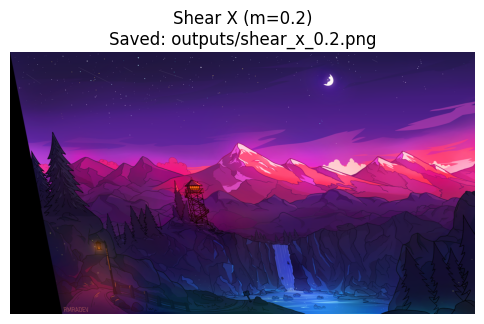

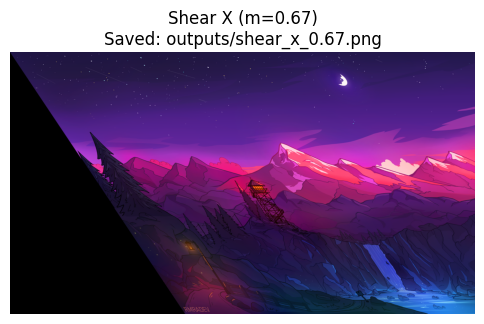

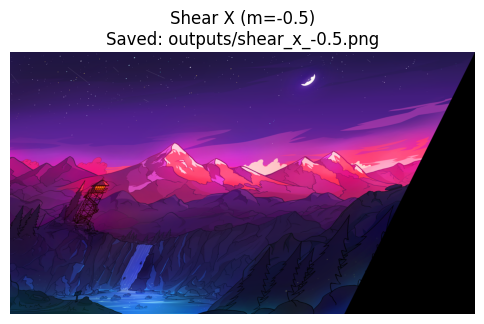

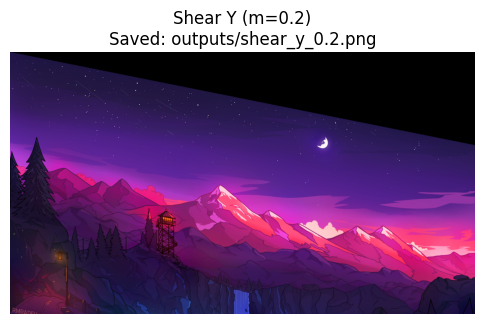

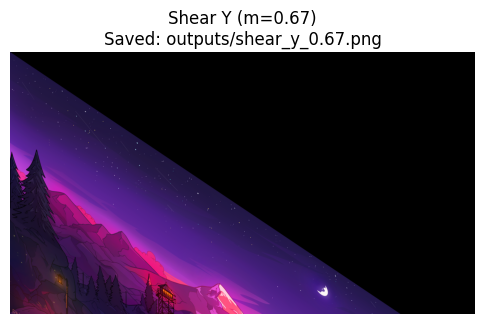

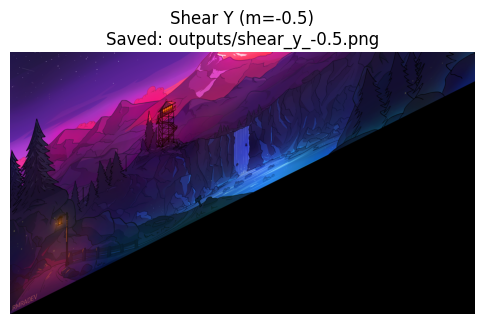

In [10]:
def shear_x(img, m: float):
    h, w = img.shape[:2]
    M = np.float32([[1, m, 0],
                    [0, 1, 0]])
    return cv2.warpAffine(img, M, (w, h))

def shear_y(img, m: float):
    h, w = img.shape[:2]
    M = np.float32([[1, 0, 0],
                    [m, 1, 0]])
    return cv2.warpAffine(img, M, (w, h))

shear_factors = [0.2, 0.67, -0.5]

for m in shear_factors:
    outx = shear_x(image, m)
    fnamex = os.path.join(OUT_DIR, f"shear_x_{m}.png")
    cv2.imwrite(fnamex, outx)
    show_bgr(outx, f"Shear X (m={m})\nSaved: {fnamex}")

for m in shear_factors:
    outy = shear_y(image, m)
    fnamey = os.path.join(OUT_DIR, f"shear_y_{m}.png")
    cv2.imwrite(fnamey, outy)
    show_bgr(outy, f"Shear Y (m={m})\nSaved: {fnamey}")


## Submission checklist

1. **Screenshots / saved images** after each transformation (see `outputs/`).
2. **Code** (this notebook).
3. **Brief report**: purpose of affine transformations + what you learned from each operation.

### Brief report (template)

**Purpose of affine transformations:**
- …

**Translation — what I learned:**
- …

**Rotation — what I learned:**
- …

**Scaling — what I learned (include extreme scaling quality):**
- …

**Shearing — what I learned (distortion/proportions):**
- …
